### <font color='blue'>Context</font>

A supermarket company recorded its sales data in 3 branches in different cities for 3 months, with a view to monitoring the turnover of its sales and identifying the factors that have contributed to the increase or decrease in turnover and quantity of products sold.

### <font color='blue'>Objective of Analysis</font>

The objective of this analysis is to carry out a deep exploratory analysis in order to extract insights that helped to understand how the variables: brand, city, type of consumer, gender, payment method, evaluation and date, time have influenced the increase or decrease of product sales.

### <font color='blue'>Description of the Variables Used in the Analysis</font>

* **Branch** - Corresponds to the brand of the product sold.

* **City** - Corresponds to the city where the sold product is located.

* **Customer type**- Corresponds to the type of customer that can be member or normal.

* **Gender**- Corresponds to the customer's gender.

* **Product line**- Corresponds to the category of the product sold.

* **Unit price**- Corresponds to the unit price of the product.

* **Quantity**- Corresponds to the quantity of products sold.

* **Total**- Corresponds to the total price of the products sold.

* **Date**- Corresponds to the date the product was sold.

* **Time**- Corresponds to the time the product was sold.

* **Payment**- Corresponds to the payment method used by the customer to pay for the product.

* **Rating**- Corresponds to the customer's evaluation of the product.

### <font color='blue'> Importing the libraries that will be used in the analysis </font>

In [1]:
import numpy as np
import pandas as pd
#vislualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as mno
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

Global chart configuration parameters, to create all charts with the same dimensions

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Loading the dataset

In [3]:
df=pd.read_csv('dados/supermarket_sales.csv')

In [4]:
df.shape

(1000, 17)

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## <font color='blue'> Data Cleanup </font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Handling Missing Values

Missing value means missing information and not missing data!

Looking for Missing Values

<AxesSubplot:>

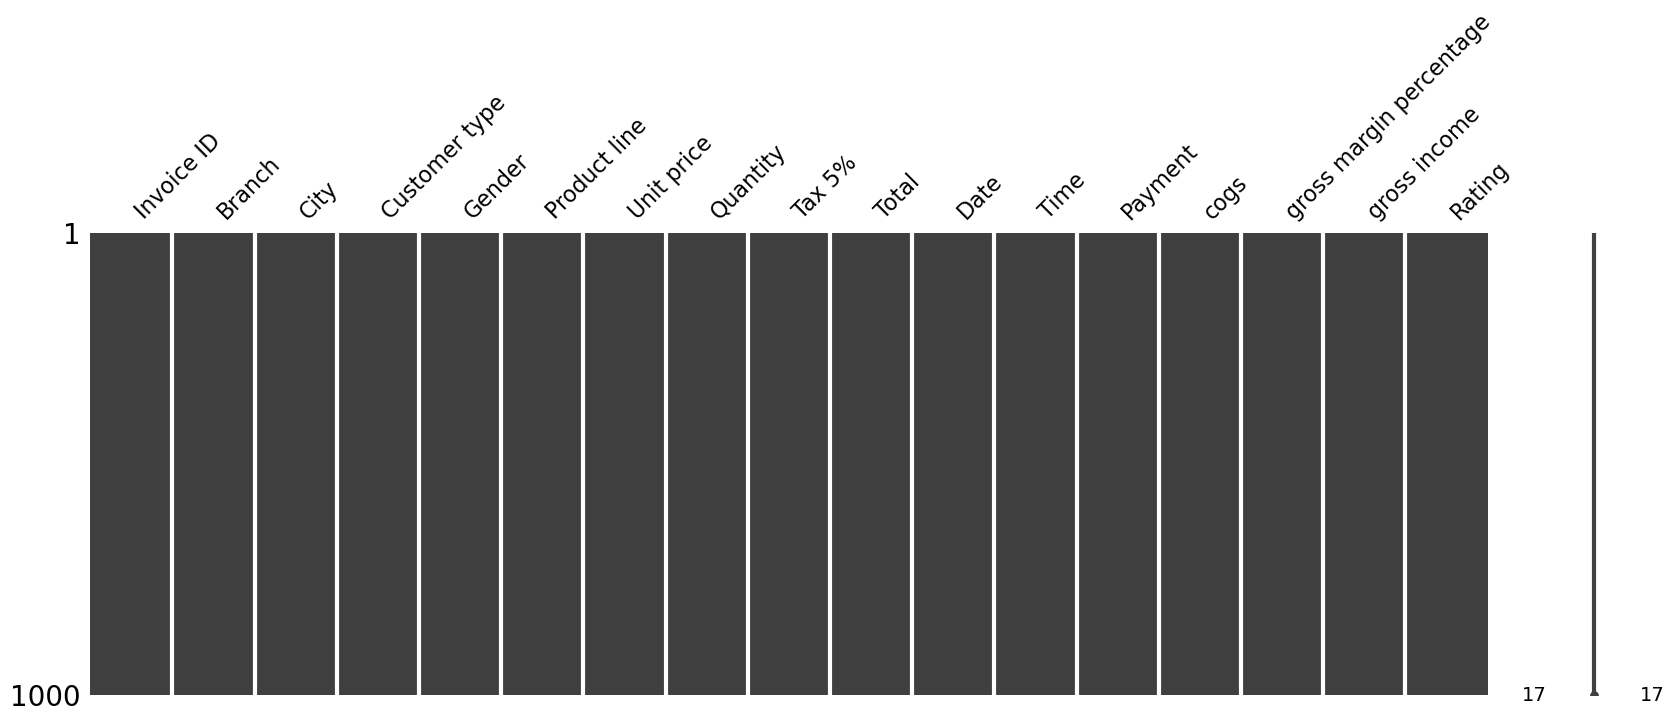

In [7]:
mno.matrix(df, figsize = (20, 6))

### Handling Duplicate Values

Duplicate values mean duplicate data across the row (whole record).

In [8]:
df.duplicated().sum()

0

In [9]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## <font color='blue'> PART 1 - Separation of categorical and numerical variables </font>

In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
# List of categorical columns
cats = ['Branch','City','Customer type','Gender','Product line','Payment']

In [13]:
# List of numeric columns
nums = ['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']

## <font color='blue'> Exploring Numerical Variables </font>

In [14]:
df[nums].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


## Univariate Analysis - Box Plots

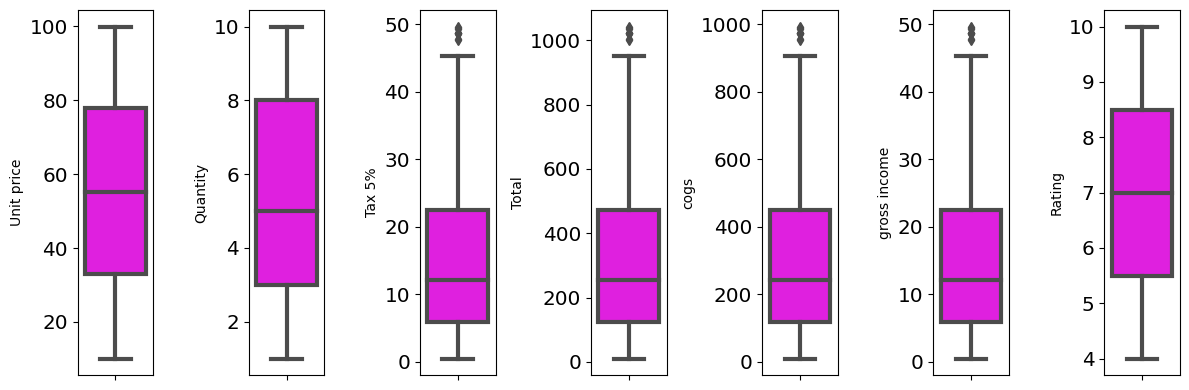

In [15]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

## Some observations:

The columns `taxa 5%`, `cogs`, `total` and `gross income` show outliers (values ​​that are much above the average), as this is
an e-commerce type database is normal because there are customers who make purchases with high values ​​compared to others.

## Bivariate Analysis - Correlation Map

In [16]:
corr_df = df[nums].corr()

<AxesSubplot:>

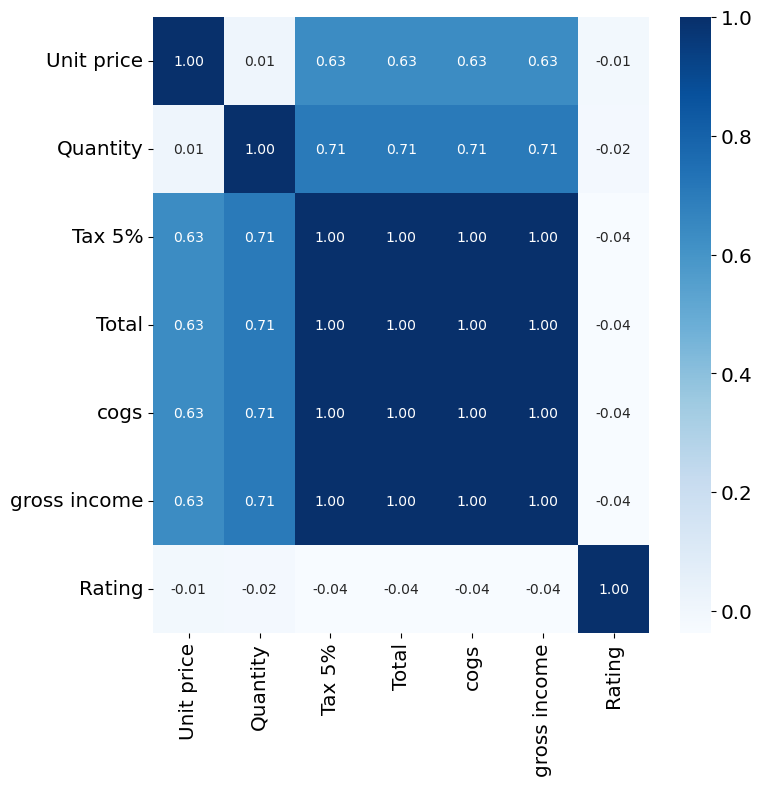

In [17]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

## From the *correlation map* above, it can be seen that:

* There is a positive correlation between `Amount` and `Total`.
* There is a positive correlation between `unit price` and `Total`.
* There is an extremely positive correlation between the variables Tax 5%, Total, cogs, Gross income which represents Multicollineality (when 2 or more variables convey the same information)

Note: We do not use correlation for categorical variables. In this case we use association.

## Exploring Categorical Variables

In [18]:
df[cats].describe()

,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000
unique,3,3,2,2,6,3
top,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,340,340,501,501,178,345


## Some observations:

* For the Branch variable **A** is the dominant class.
* For the City variable **Yangon** is the ruling class.
* For the Customer type variable **Member** is the dominant class.
* For the gender variable, **F(Female)** is the ruling class.
* For the Product line variable, **Fashion Accessories** is the dominant class.
* For the Payment variable, **Ewallet** is the dominant class.
* All unique values ​​for each category are around **2-6 unique values**

## <font color='blue'> Categorical Columns x Variable Target(Total Sold) </font>

* At this point, we are going to analyze how the variables *brand*, *city*, *type of consumer*, *gender*, *product line* and *payment method* have influenced the *total value obtained from sales*.

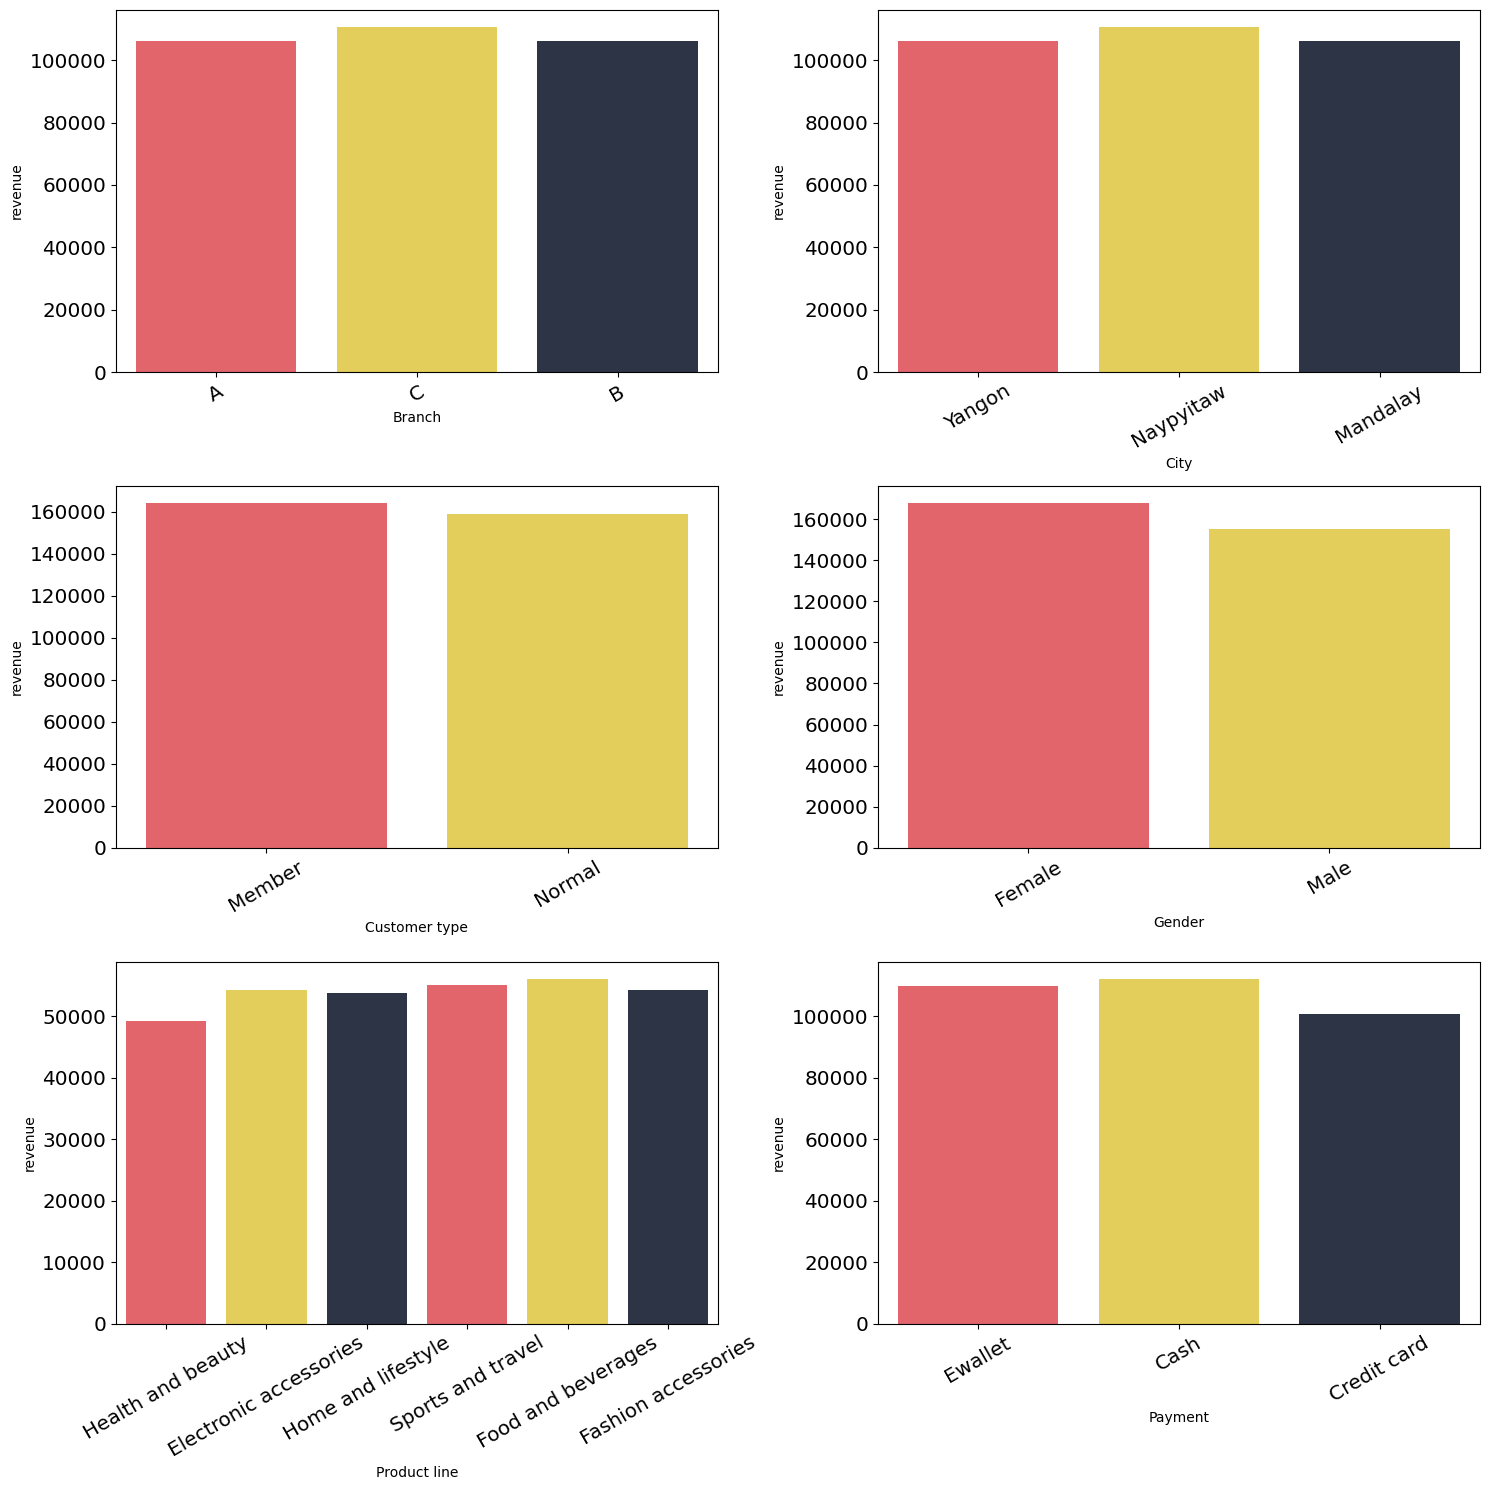

In [19]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Total', data=df, ci=None, estimator=sum, palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.ylabel('revenue')
    plt.tight_layout()

## <font color='blue'> Categorical Columns x Variable Target(Quantity) </font>

* At this point, let's analyze how the variables *brand*, *city*, *type of consumer*, *gender*, *product line* and *payment method* have influenced the *quantity of products sold*.

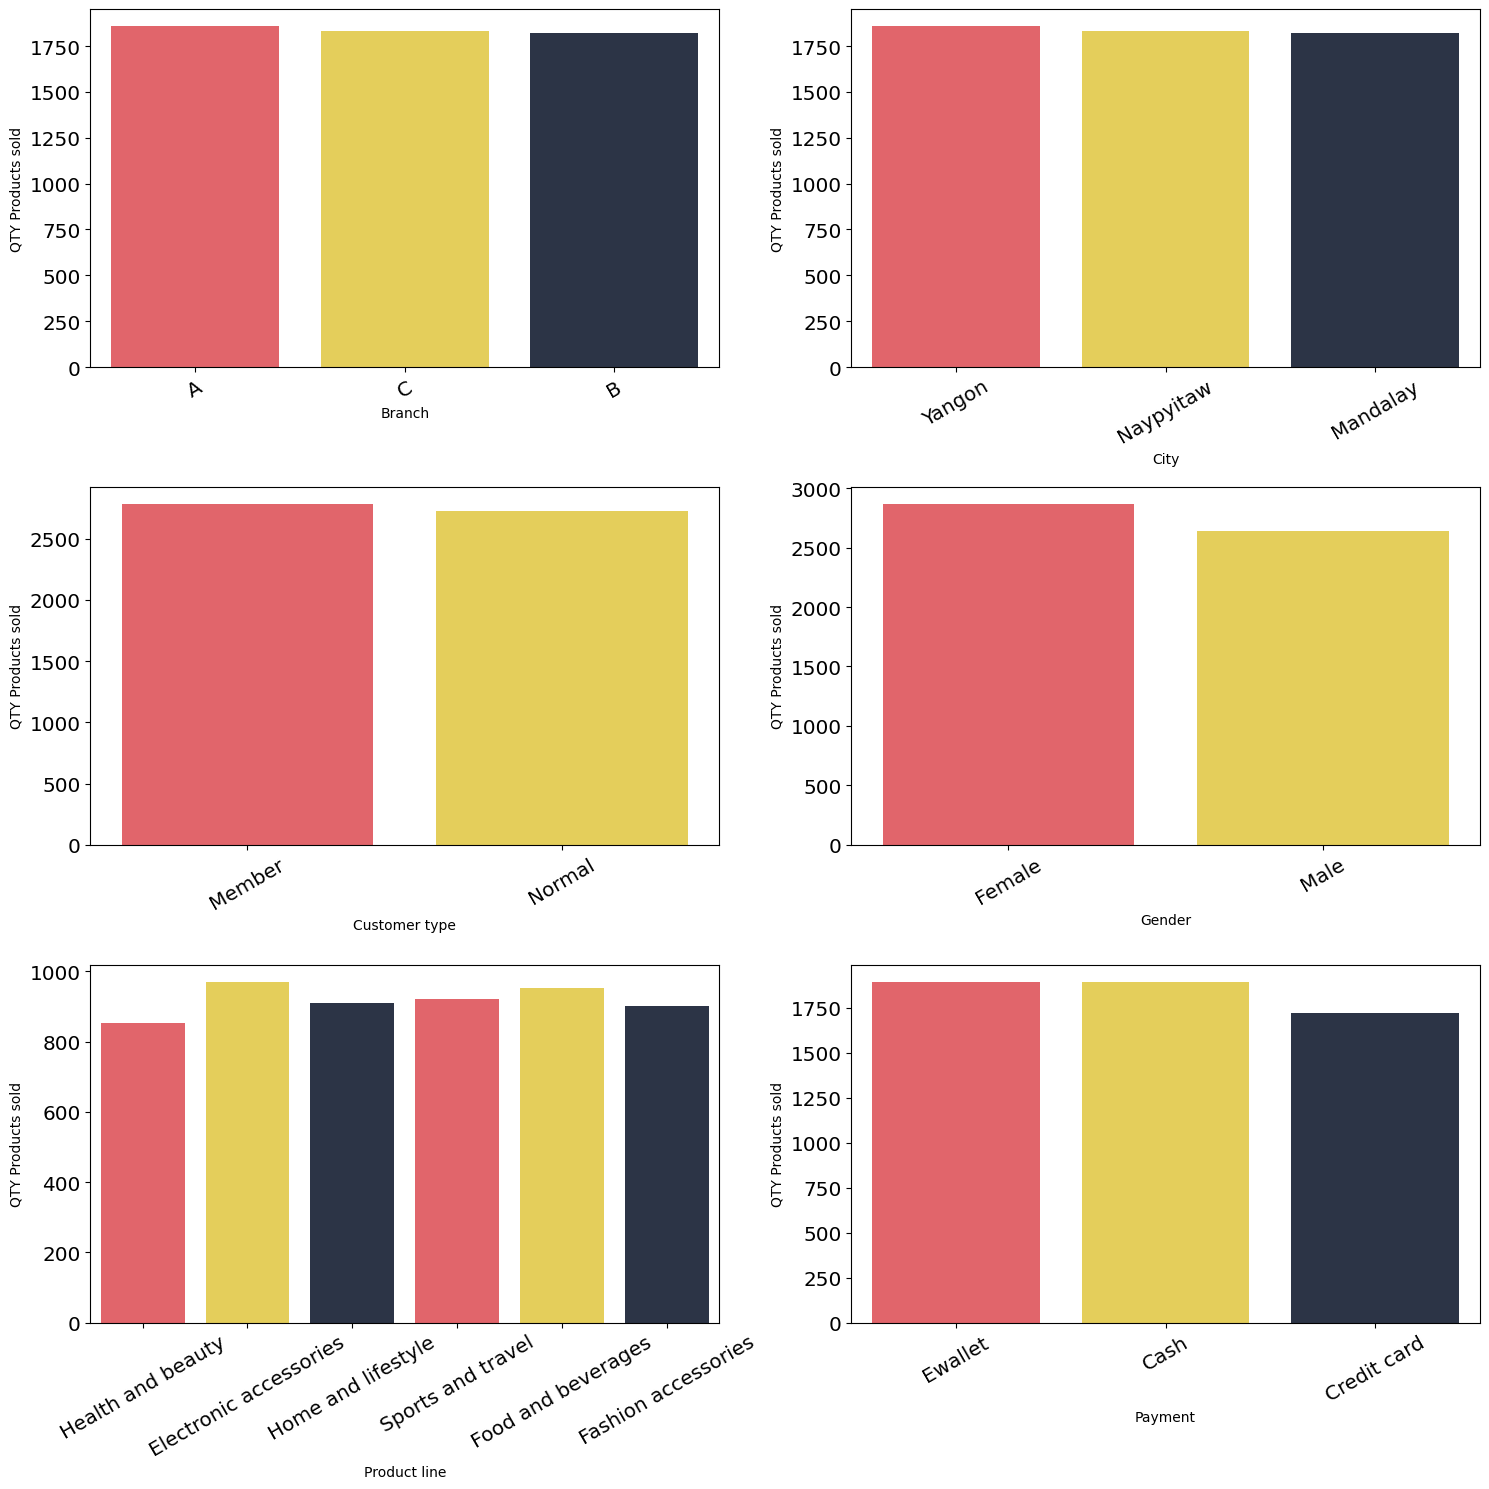

In [20]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Quantity', data=df, ci=None, estimator=sum, palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.ylabel('QTY Products sold')
    plt.tight_layout()

## <font color='blue'> Categorical Variables x Target(Rating) Variable </font>

* At this point, we are going to analyze how the variables *brand*, *city*, *type of consumer*, *gender*, *product line* and *payment method* have influenced the *client evaluation*.

In [21]:
df['Avaliacao'] = np.where(
        (df['Rating'] >= 1) & (df['Rating'] < 6 ), "Low", 
    np.where(
        (df['Rating'] >= 6) & (df['Rating'] < 8 ),"Mean", 
    np.where(
        (df['Rating'] >= 8) &  (df['Rating'] < 11 ), "High" , 'x')))

In [22]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Avaliacao
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,High
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,High
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mean
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,High
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Low


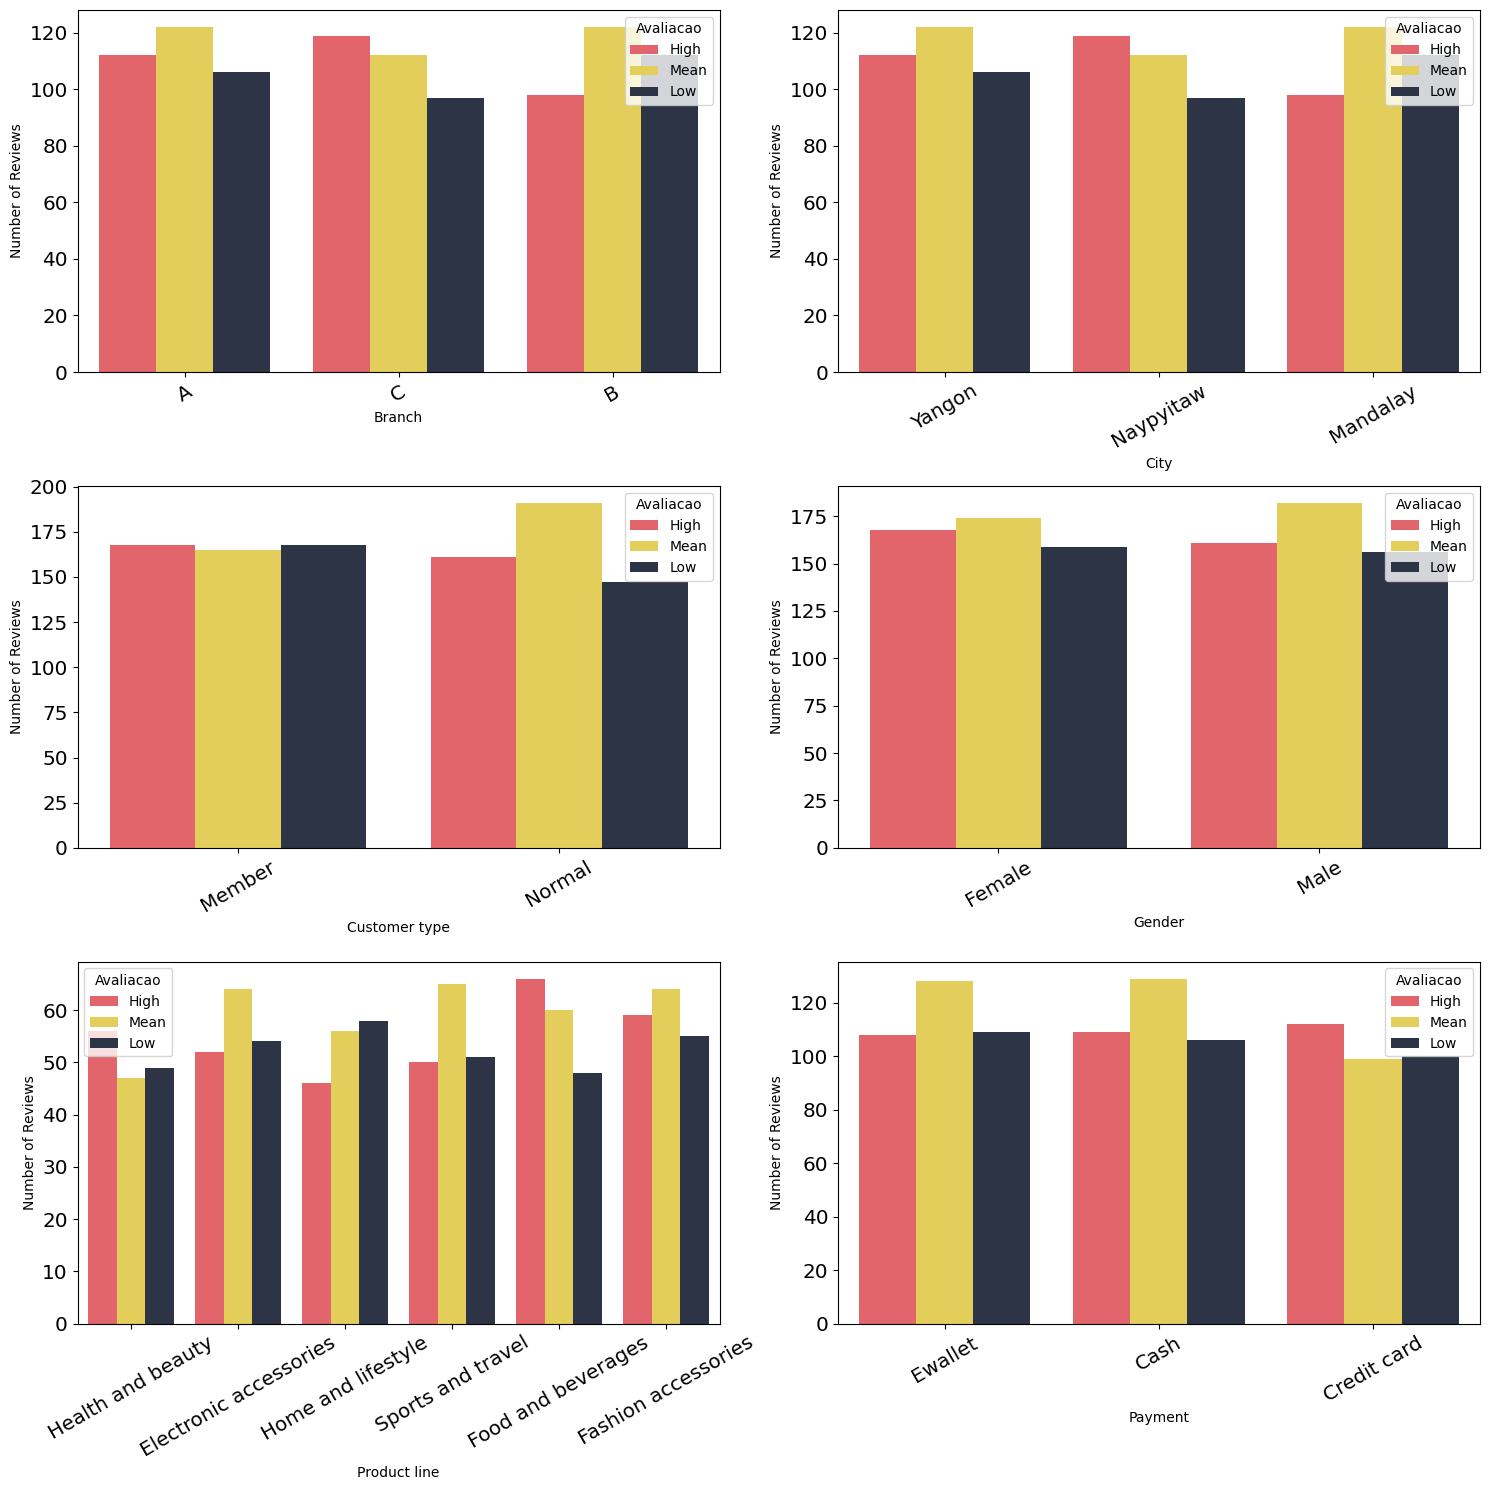

In [23]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(data = df, x = cats[i], hue = 'Avaliacao', palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.ylabel('Number of Reviews')
    plt.tight_layout()

##  <font color='blue'> TIME SERIES ANALYSIS </font>

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['mes'] = df['Date'].dt.month_name(locale = 'English')

In [25]:
df['horas'] = pd.to_datetime(df['Time'], format = '%H:%M').dt.hour

In [26]:
df['dayName'] = df['Date'].dt.day_name()

In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Avaliacao,mes,horas,dayName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,High,January,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,High,March,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mean,March,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,High,January,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Low,February,10,Friday


In [28]:
dfgroup1 = df.groupby('horas')['Total'].sum()
dfgroup1

horas
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

In [29]:
df['Periodo'] = np.where(
        (df['horas'] == 10), "in the morning", 
    np.where(
        (df['horas'] == 11), "in the morning", 
    np.where(
        (df['horas'] == 12), "The afternoon", 
    np.where(
        (df['horas'] == 13), "The afternoon", 
    np.where(
        (df['horas'] == 14), "The afternoon", 
    np.where(
        (df['horas'] == 15), "The afternoon", 
    np.where(
        (df['horas'] == 16), "The afternoon", 
    np.where(
        (df['horas'] == 17), "The afternoon", 
    np.where(
        (df['horas'] == 18), "At night", 
    np.where(
        (df['horas'] == 19), "At night", 
    np.where(
        (df['horas'] == 20), "At night" , 'x')))))))))))

In [30]:
df['horas'] = np.where(
        (df['horas'] == 10), "10 Horas", 
    np.where(
        (df['horas'] == 11), "11 Horas", 
    np.where(
        (df['horas'] == 12), "12 Horas", 
    np.where(
        (df['horas'] == 13), "13 Horas", 
    np.where(
        (df['horas'] == 14), "14 Horas", 
    np.where(
        (df['horas'] == 15), "15 Horas", 
    np.where(
        (df['horas'] == 16), "16 Horas", 
    np.where(
        (df['horas'] == 17), "17 Horas", 
    np.where(
        (df['horas'] == 18), "18 Horas", 
    np.where(
        (df['horas'] == 19), "19 Horas", 
    np.where(
        (df['horas'] == 20), "20 Horas" , 'x')))))))))))

In [31]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Avaliacao                          object
mes                                object
horas                              object
dayName                            object
Periodo                            object
dtype: object

In [32]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Avaliacao,mes,horas,dayName,Periodo
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,High,January,13 Horas,Saturday,The afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,High,March,10 Horas,Friday,in the morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,Mean,March,13 Horas,Sunday,The afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,High,January,20 Horas,Sunday,At night
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,Low,February,10 Horas,Friday,in the morning


## <font color='red'> Sales Invoice during the 3 months </font>

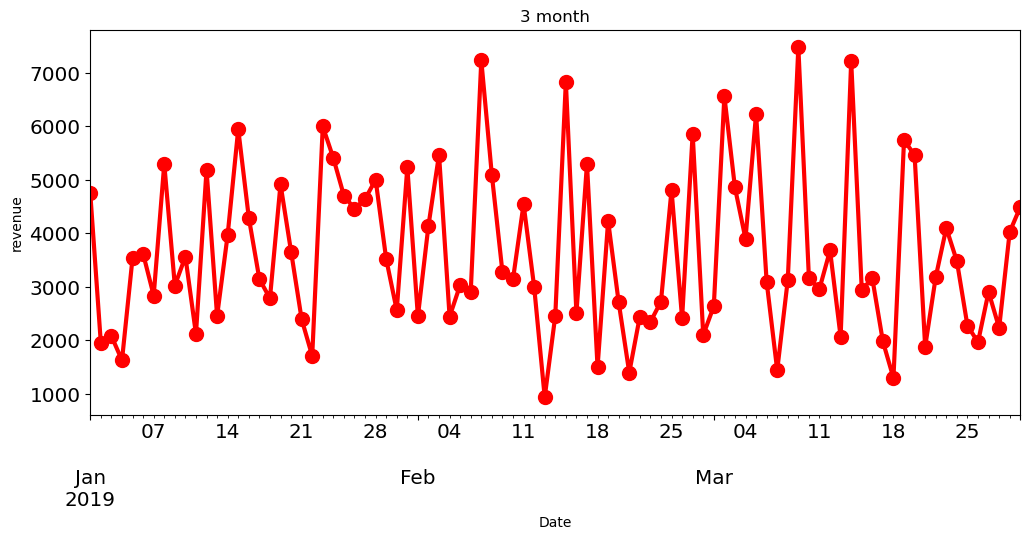

In [33]:

plt.figure(figsize=(12,5))
plt.title('3 month')
plt.ylabel('revenue')
df.groupby('Date')['Total'].sum().plot(kind='line', marker='o', color='red', ms=10, label="Expenses")
plt.show()

## <font color='red'> Quantity of products sold during the 3 months </font>

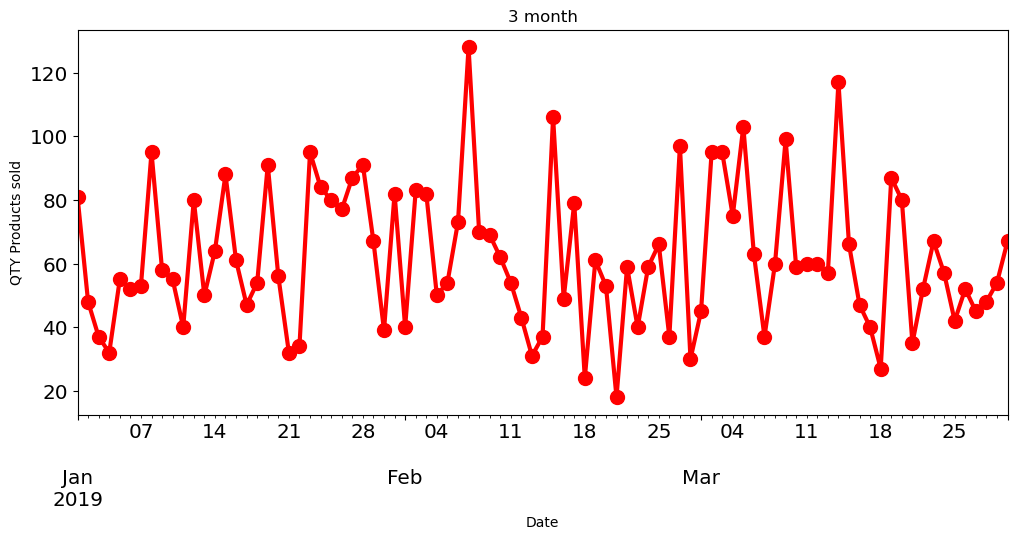

In [34]:

plt.figure(figsize=(12,5))
plt.title('3 month')
plt.ylabel('QTY Products sold')     
df.groupby('Date')['Quantity'].sum().plot(kind='line', marker='o', color='red', ms=10)
plt.show()

## <font color='orange'> Daily average of Sales Revenue during the 3 months </font>

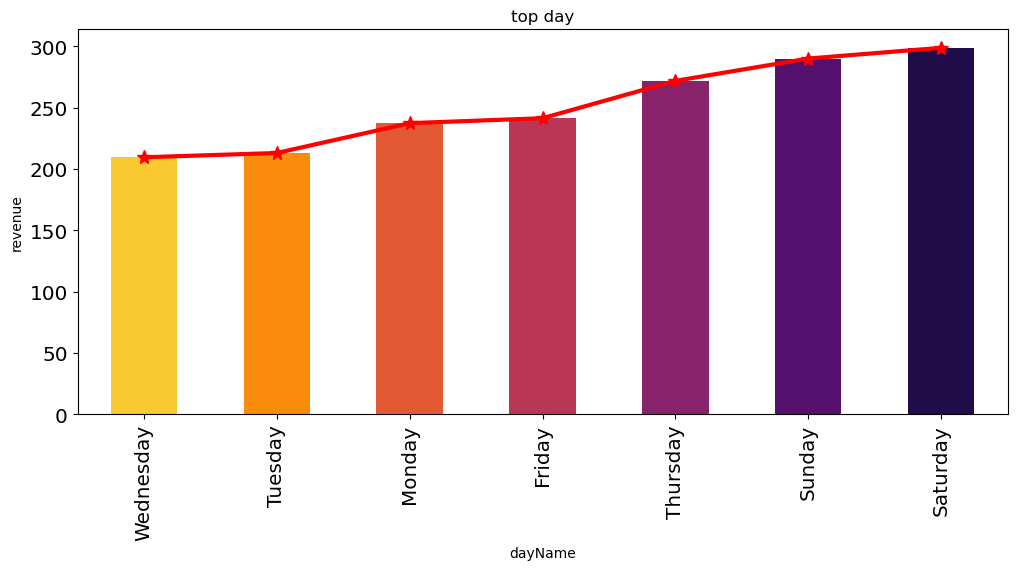

In [35]:
plt.figure(figsize=(12,5))
plt.title('top day')
plt.ylabel('revenue')
df.groupby('dayName')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('dayName')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='orange'> Daily average of the quantity of products sold during the 3 months </font>

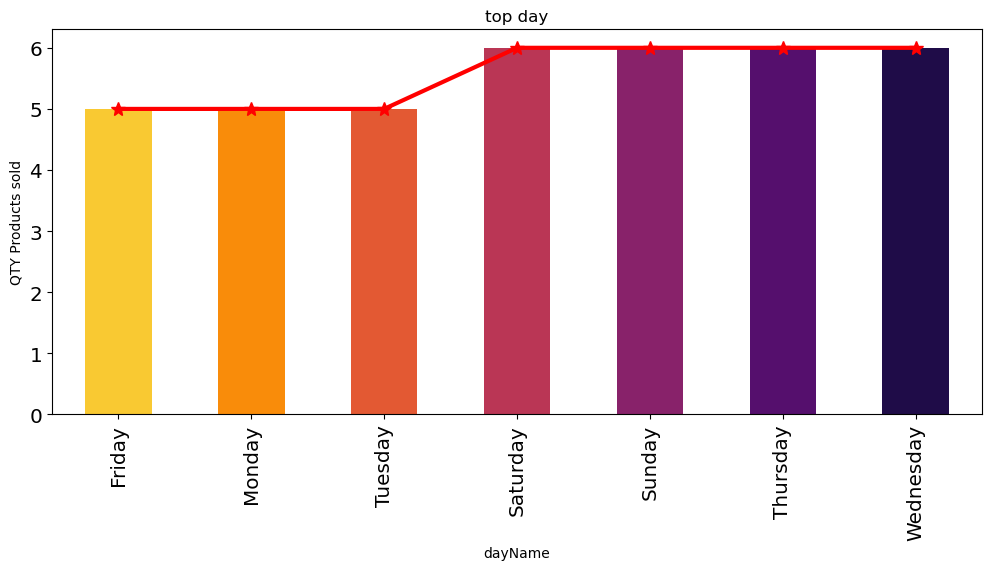

In [36]:
plt.figure(figsize=(12,5))
plt.title('top day')
plt.ylabel('QTY Products sold')
df.groupby('dayName')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('dayName')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='orange'> Average Sales Revenue at different times of the day during the 3 months </font>

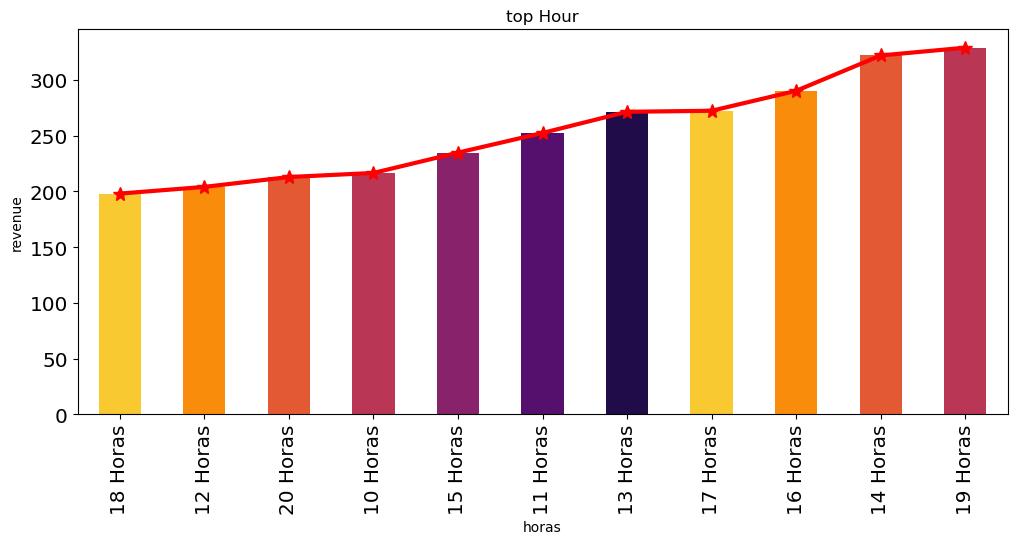

In [37]:
plt.figure(figsize=(12,5))
plt.title('top Hour')
plt.ylabel('revenue')
df.groupby('horas')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('horas')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='orange'> Average quantity of products sold at different times of the day during the 3 months </font>

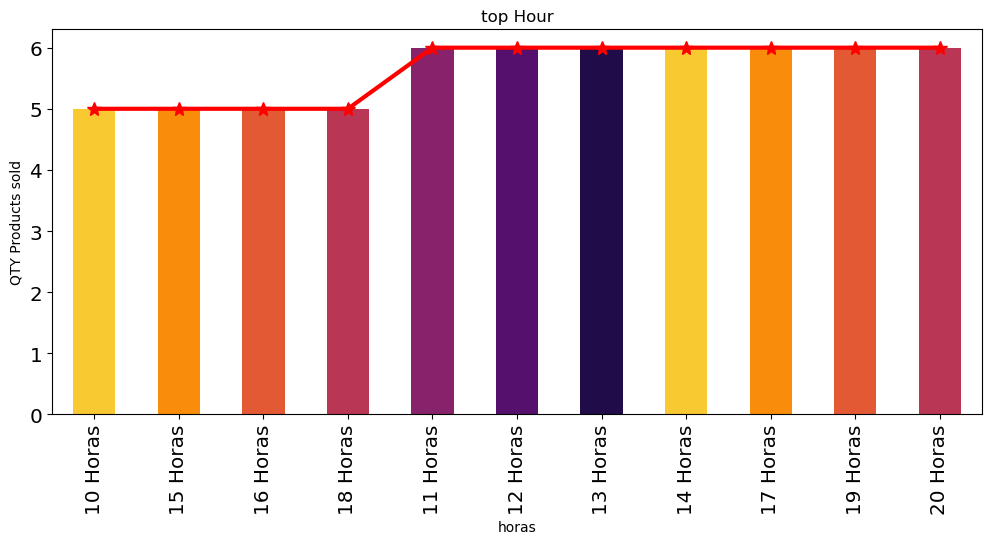

In [38]:
plt.figure(figsize=(12,5))
plt.title('top Hour')
plt.ylabel('QTY Products sold')
df.groupby('horas')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('horas')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='red'> Sales invoicing according to the time of day</font>

* At this point, we are going to analyze how the variables *brand*, *city*, *type of consumer*, *gender*, *product line* and *payment method* have influenced *sales revenue* according to the *Day period.

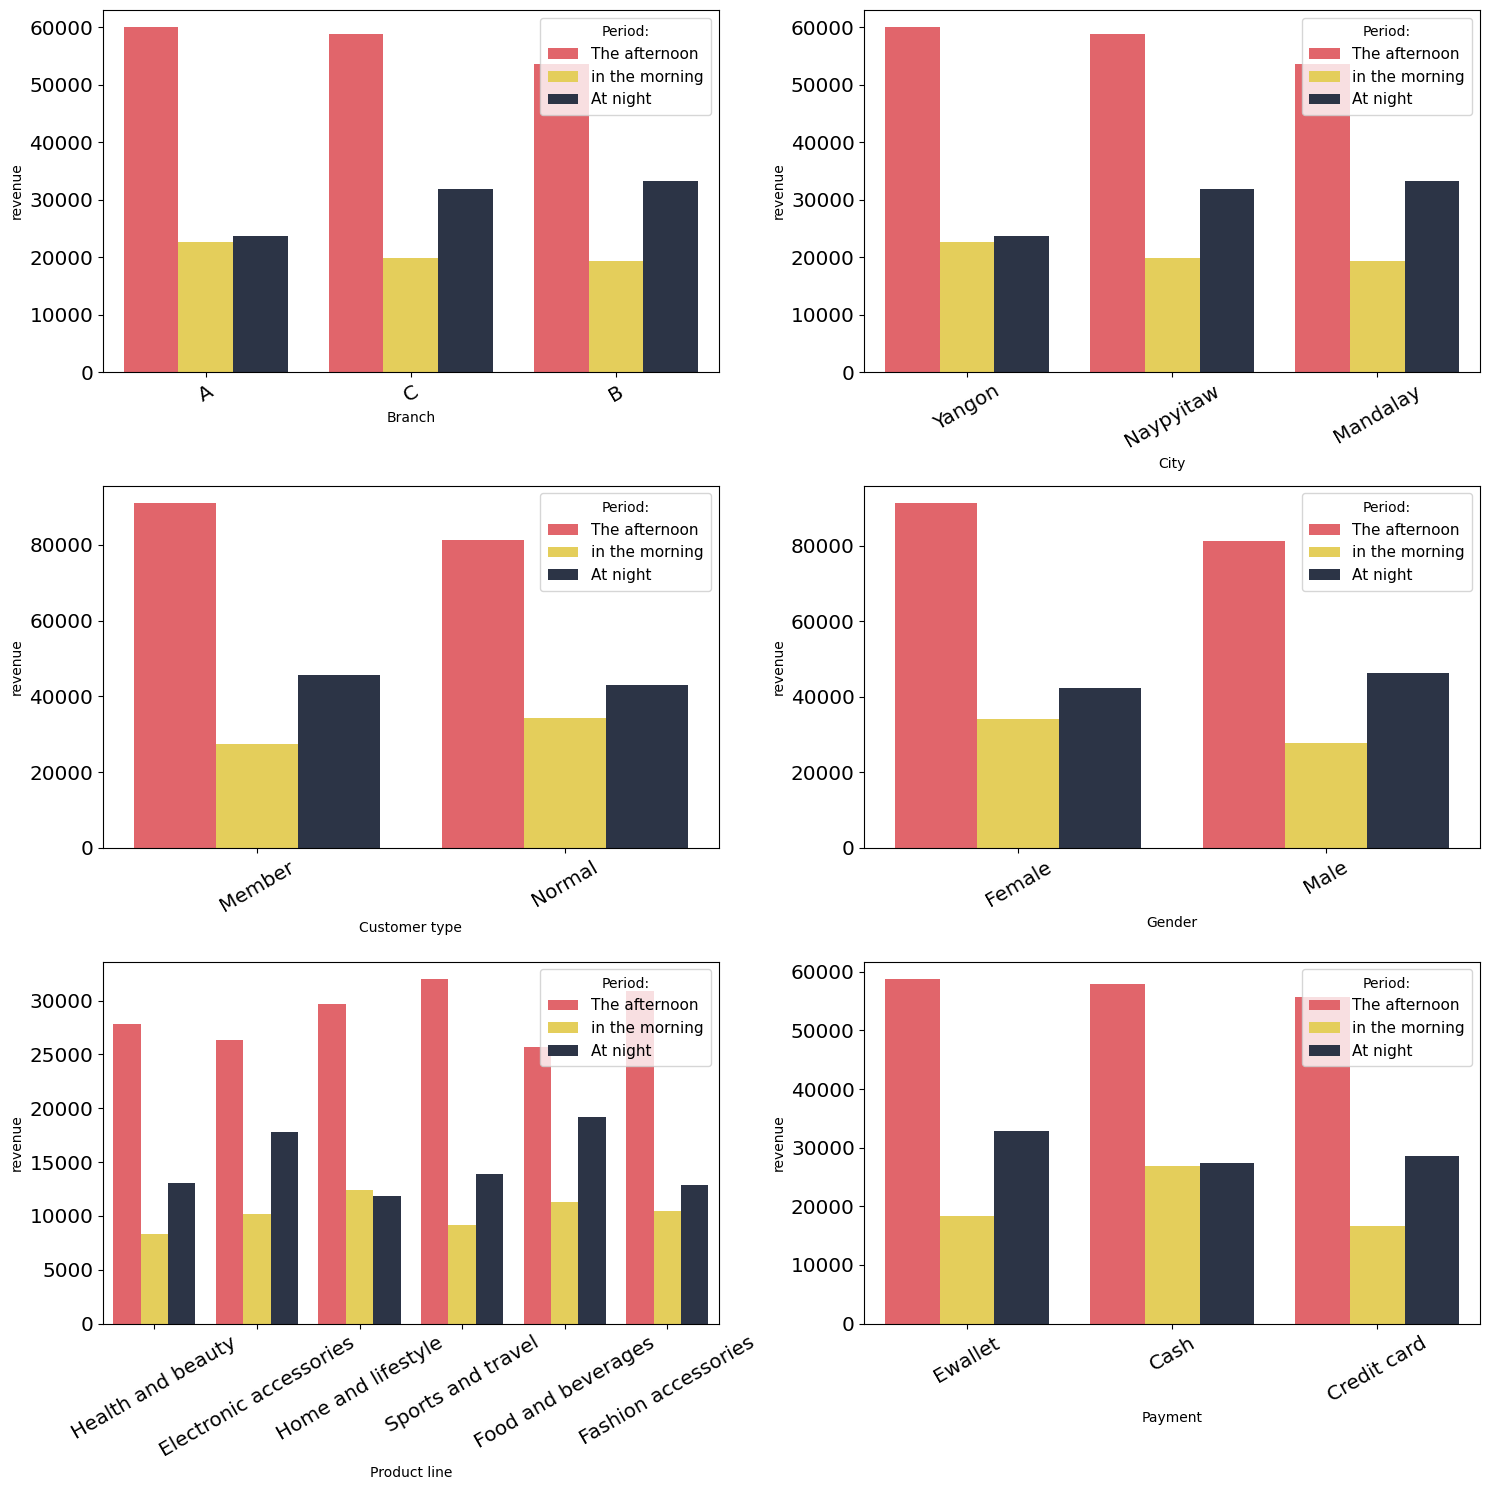

In [39]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Total', data=df, ci=None, estimator=sum, hue = 'Periodo', 
                palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.ylabel('revenue')
    plt.legend(loc = 'upper right', 
           borderpad = 0.5, 
           labelspacing = 0.5, 
           fontsize = 11, 
           title = 'Period:')

## <font color='red'> Quantity of products sold according to the time of day</font>

* At this point, we are going to analyze how the variables *brand*, *city*, *type of consumer*, *gender*, *product line* and *payment method* have influenced the *quantity of products sold* according to the *period* of the day.

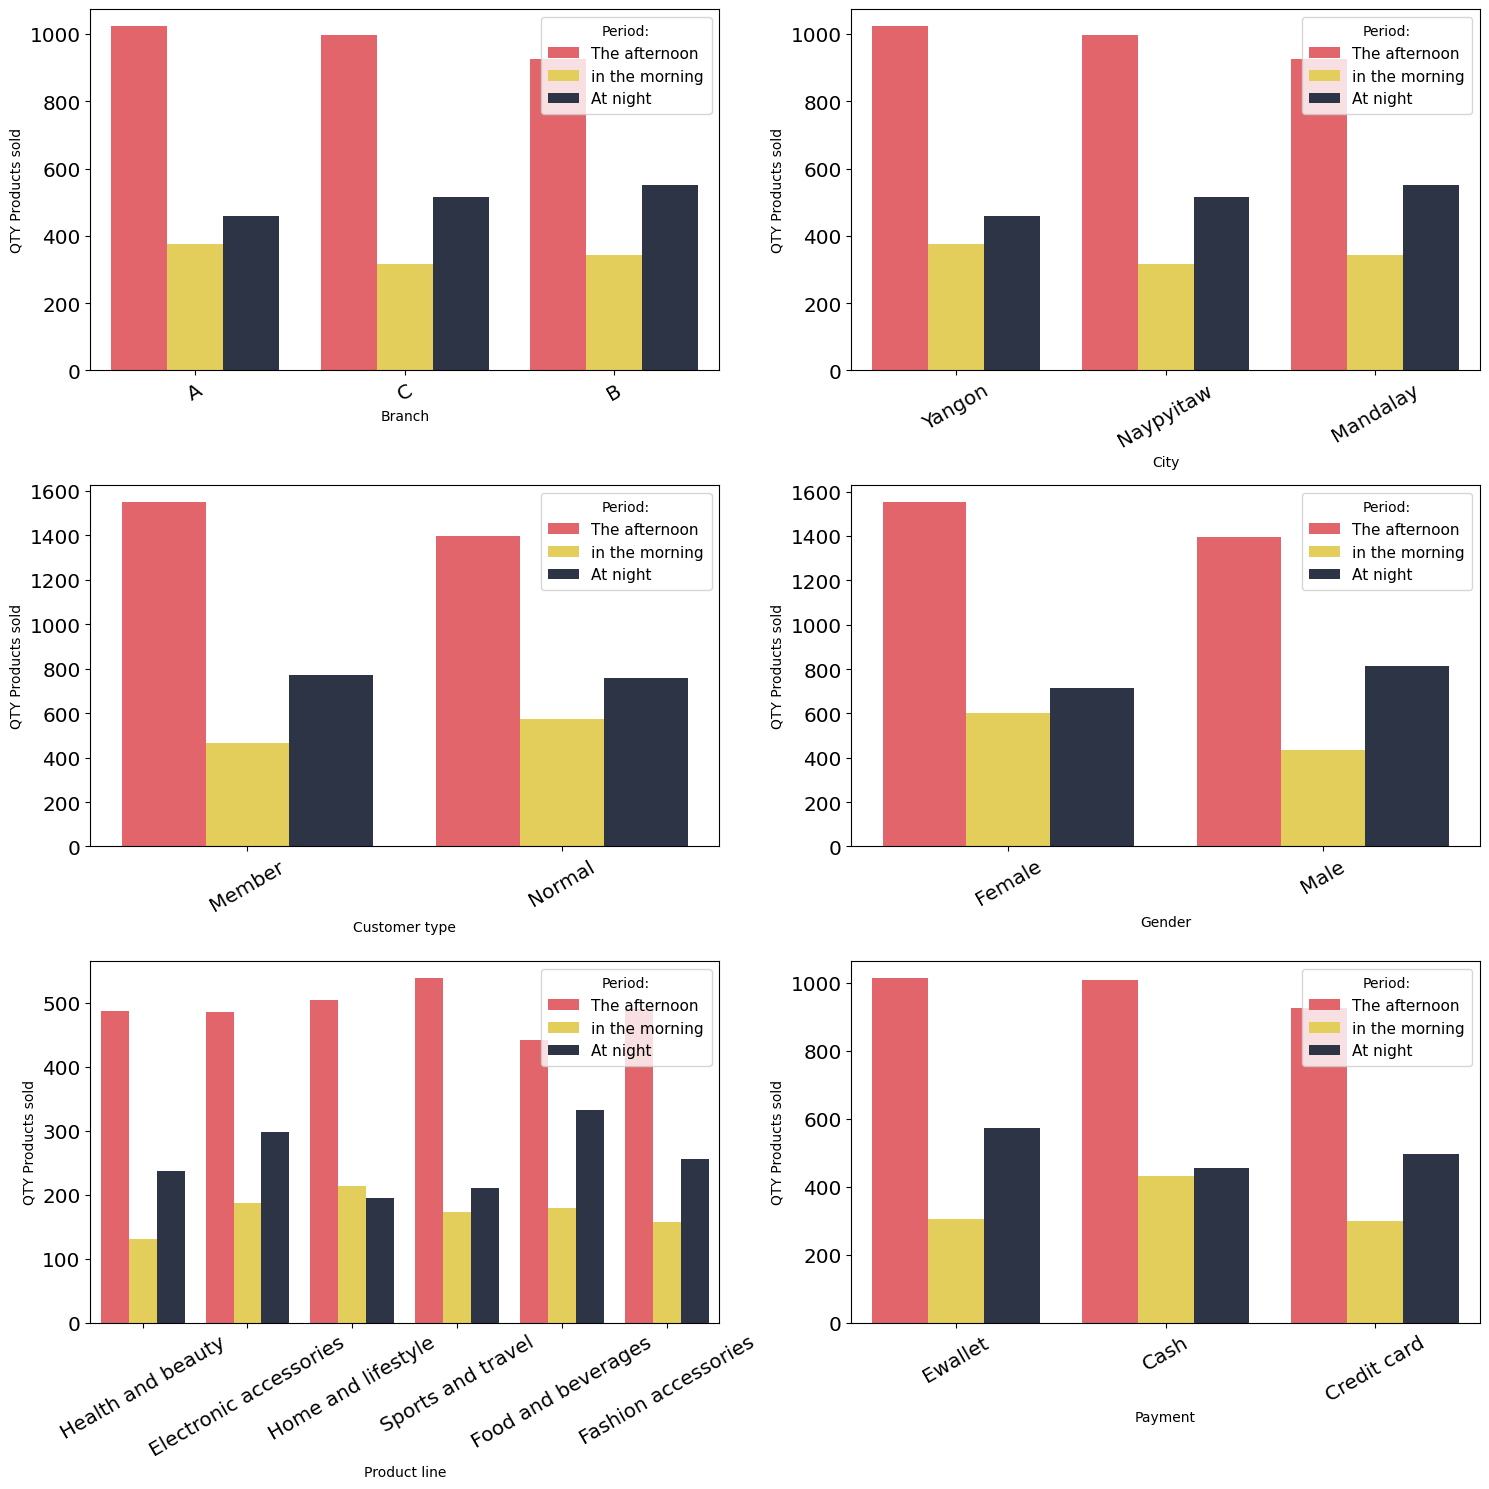

In [40]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Quantity', data=df, ci=None, estimator=sum, hue = 'Periodo', 
                palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.ylabel('QTY Products sold')
    plt.legend(loc = 'upper right', 
           borderpad = 0.5, 
           labelspacing = 0.5, 
           fontsize = 11, 
           title = 'Period:')